In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', None)

In [2]:
import nltk

In [3]:
trip = pd.read_csv(r"C:\5 Machine Learning\DL\Trip_advisor_review.csv")
trip.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [4]:
trip.isnull().sum()[trip.isnull().sum()>0]

Series([], dtype: int64)

In [5]:
trip.shape

(20491, 2)

In [6]:
trip.Rating.value_counts()

5    9054
4    6039
3    2184
2    1793
1    1421
Name: Rating, dtype: int64

In [7]:
trip.Rating = trip.Rating.replace({2:1,3:2,5:3,4:2})

In [8]:
trip.Review = trip.Review.str.lower()                  #to convert text into lower case

In [9]:
from nltk.corpus import stopwords                      #to remove insignificant frequently appearing words

In [10]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
def text_process(mess):
    """
    1.remove the punctuations
    2.remove stopwords
    3.return the list of clean textwords
    """
    nonpunc = [char for char in mess if char not in string.punctuation]
    nonpunc = "".join(nonpunc)

    return[word for word in nonpunc.split() if word not in stopwords.words('english')]

In [13]:
trip['Review'].apply(text_process)

0        [nice, hotel, expensive, parking, got, good, d...
1        [ok, nothing, special, charge, diamond, member...
2        [nice, rooms, 4, experience, hotel, monaco, se...
3        [unique, great, stay, wonderful, time, hotel, ...
4        [great, stay, great, stay, went, seahawk, game...
                               ...                        
20486    [best, kept, secret, 3rd, time, staying, charm...
20487    [great, location, price, view, hotel, great, q...
20488    [ok, looks, nice, modern, outside, desk, staff...
20489    [hotel, theft, ruined, vacation, hotel, opened...
20490    [people, talking, ca, nt, believe, excellent, ...
Name: Review, Length: 20491, dtype: object

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
cv =CountVectorizer(analyzer =text_process).fit(trip['Review'])   #for tokenization

In [16]:
len(cv.vocabulary_)

81408

In [17]:
tripdata = cv.transform(trip['Review'])    #matrix form

In [18]:
tripdata.shape

(20491, 81408)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
train_x, test_x, train_y, test_y= train_test_split(tripdata, trip.Rating, test_size=0.2)

In [24]:
train_x.shape

(16392, 81408)

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
trip_nb =MultinomialNB()

In [27]:
trip_nb.fit(train_x,train_y)

MultinomialNB()

In [28]:
pred = trip_nb.predict(test_x)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(test_y,pred)

array([[ 389,  245,   15],
       [  53, 1035,  571],
       [  11,  362, 1418]], dtype=int64)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(test_y,pred)

0.6933398389851183

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc = RandomForestClassifier()

In [40]:
rfc.fit(train_x,train_y)

RandomForestClassifier()

In [41]:
pred_rfc = rfc.predict(test_x)

In [42]:
accuracy_score(test_y,pred_rfc)

0.6535740424493779

In [43]:
from wordcloud import WordCloud

In [44]:
WordCloud

wordcloud.wordcloud.WordCloud

In [45]:
wd_trip = WordCloud(stopwords = stopwords.words('english'), random_state=123).generate(str(trip['Review']))

In [46]:
import matplotlib.pyplot as plt

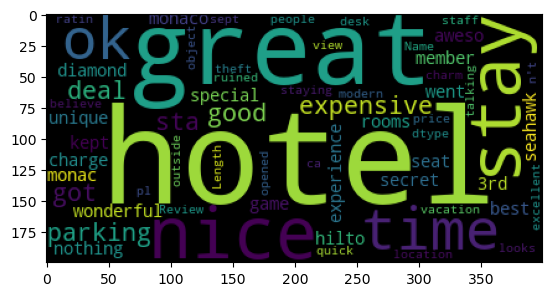

In [47]:
plt.imshow(wd_trip)